# Kernelized Pegasos - Multiclass Classification of Handwritten Digits 


## Installing the necessary libraries

In [ ]:
!pip install h5py
!pip install matplotlib
!pip install numpy
!pip install sklearn
!pip install pandas

## Importing the libraries

In [1]:
import numpy as np
import h5py
import matplotlib
from sklearn.model_selection import KFold
import pandas as pd
from numpy import linalg
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

## Loading the dataset

In [3]:
with h5py.File('usps.h5', 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]


## Sample Data Visualization

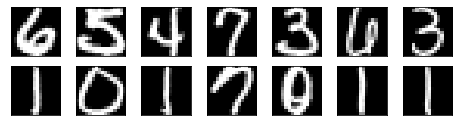

In [4]:
fig = plt.figure(figsize =(8,2))
for i in range(14):
    ax = fig.add_subplot(2,7,i+1,xticks=[],yticks=[])
    ax.imshow(X_tr[[i]].reshape(16,16),cmap="gray")

## Preprocessing the dataset

In [5]:
X_train = pd.DataFrame(X_tr)
y_train = pd.DataFrame(y_tr)

X_test = pd.DataFrame(X_te)
y_test = pd.DataFrame(y_te)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
print("SAMPLE DATASET VALUES:\n",X.head(), "\n\nSAMPLE LABELS VALUES:\n", y.head(), "\n\nPOSSIBLE LABELS VALUES:\n",y[0].unique())

# Select the first 700 records of the dataset
X=X.iloc[:700]
X.head()

SAMPLE DATASET VALUES:
    0    1    2       3       4       5       6       7       8       9    ...  \
0  0.0  0.0  0.0  0.0000  0.0000  0.0000  0.0000  0.1845  0.9310  0.4165  ...   
1  0.0  0.0  0.0  0.0935  0.1645  0.0955  0.0565  0.1645  0.0735  0.0000  ...   
2  0.0  0.0  0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0020  ...   
3  0.0  0.0  0.0  0.0000  0.0000  0.3635  0.8420  0.9800  0.7250  0.4665  ...   
4  0.0  0.0  0.0  0.0000  0.0000  0.0360  0.3980  0.8755  0.7330  0.6170  ...   

      246     247     248     249     250     251     252     253    254  255  
0  0.6520  0.9115  1.0000  0.7410  0.2630  0.0045  0.0000  0.0000  0.000  0.0  
1  0.1645  0.1645  0.4835  0.8805  0.8810  0.5630  0.4525  0.1645  0.086  0.0  
2  0.0000  0.0000  0.0000  0.4455  1.0000  0.4105  0.0000  0.0000  0.000  0.0  
3  0.3410  1.0000  0.7680  0.0065  0.0000  0.0000  0.0000  0.0000  0.000  0.0  
4  0.7330  0.8195  1.0000  1.0000  0.8955  0.7195  0.4005  0.0585  0.000  0.0  

[5 rows 

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.1845,0.9310,0.4165,...,0.6520,0.9115,1.0000,0.7410,0.2630,0.0045,0.0000,0.0000,0.000,0.0
1,0.0,0.0,0.0,0.0935,0.1645,0.0955,0.0565,0.1645,0.0735,0.0000,...,0.1645,0.1645,0.4835,0.8805,0.8810,0.5630,0.4525,0.1645,0.086,0.0
2,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,...,0.0000,0.0000,0.0000,0.4455,1.0000,0.4105,0.0000,0.0000,0.000,0.0
3,0.0,0.0,0.0,0.0000,0.0000,0.3635,0.8420,0.9800,0.7250,0.4665,...,0.3410,1.0000,0.7680,0.0065,0.0000,0.0000,0.0000,0.0000,0.000,0.0
4,0.0,0.0,0.0,0.0000,0.0000,0.0360,0.3980,0.8755,0.7330,0.6170,...,0.7330,0.8195,1.0000,1.0000,0.8955,0.7195,0.4005,0.0585,0.000,0.0


In [6]:
y.rename({0:'number'}, axis='columns', inplace=True)
y=pd.get_dummies(y, columns=['number'])
y.head()

,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0


In [7]:
for i in range(10):
    i=str(i)
    y["number_"+i] = np.where(y["number_"+i] < 1, -1,1)
y

,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9
0,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
2,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
4,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...
2002,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
2003,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2004,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
2005,1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## Principal Components PCA

In [8]:
pca_a = PCA(n_components=200)
pca_a.fit(X)
X_pca = pca_a.transform(X)
print("shape of the dataset after PCA: ", np.shape(X_pca))

shape of the dataset after PCA:  (700, 200)


In [9]:
var = np.var(X_pca, axis=0)
var_ratio = var/(np.sum(var))
var_sum=np.sum(var_ratio)

print ("Variance Ratio of the 200 PCA: ", var_ratio)


Variance Ratio of the 200 PCA:  [1.75978512e-01 8.91532227e-02 6.87891245e-02 5.61213419e-02
 5.14459312e-02 4.01510075e-02 3.35176438e-02 2.99881771e-02
 2.80624516e-02 2.37630680e-02 2.22093239e-02 2.02585515e-02
 1.88109502e-02 1.49308331e-02 1.43594472e-02 1.34767508e-02
 1.24184350e-02 1.12190768e-02 1.08665554e-02 1.07014999e-02
 1.00951521e-02 9.40574333e-03 8.60849302e-03 7.98374321e-03
 7.47191068e-03 7.05128955e-03 6.85926620e-03 6.52428390e-03
 6.22158265e-03 5.90628665e-03 5.73573494e-03 5.51911816e-03
 5.30874170e-03 4.92029311e-03 4.71635163e-03 4.68957471e-03
 4.51528886e-03 4.30460554e-03 4.07218514e-03 3.96533124e-03
 3.87403183e-03 3.73875280e-03 3.55888880e-03 3.49457189e-03
 3.32166976e-03 3.23009002e-03 3.12258280e-03 3.01769725e-03
 2.78804870e-03 2.73570023e-03 2.68350611e-03 2.62737065e-03
 2.40063737e-03 2.37893173e-03 2.24911771e-03 2.17231200e-03
 2.12847767e-03 2.05079792e-03 2.04381417e-03 1.98966404e-03
 1.92084257e-03 1.89379649e-03 1.81974063e-03 1.71930

In [10]:
var_fin=np.array([1.8043000e-01,8.8904090e-02,6.6849954e-02,5.5888616e-02,4.9554903e-02,
 3.8255863e-02,3.2640375e-02,3.0857034e-02, 2.6015023e-02, 2.4381567e-02,
 2.1803847e-02, 2.0125775e-02, 1.6919494e-02, 1.4615145e-02, 1.4193491e-02,
 1.2935141e-02, 1.2282434e-02, 1.1450666e-02, 1.0690659e-02, 1.0058904e-02,
 9.8345513e-03, 9.3609560e-03, 8.2707014e-03,7.6950174e-03, 7.2925999e-03,
 7.0683812e-03, 6.3953497e-03, 6.2828194e-03,6.1661615e-03, 5.8499807e-03,
 5.6642340e-03, 5.4574595e-03, 5.2659195e-03, 4.8375917e-03, 4.7658994e-03,
 4.6581617e-03, 4.3073972e-03, 4.1973251e-03, 4.1048685e-03, 3.8934306e-03,
 3.8073193e-03, 3.6843629e-03, 3.5994037e-03, 3.2797279e-03, 3.2545016e-03,
 3.1871612e-03, 3.1257011e-03, 2.9787151e-03, 2.8699748e-03, 2.7779706e-03,
 2.6285853e-03, 2.5359988e-03, 2.4396980e-03, 2.3722765e-03, 2.3057396e-03,
 2.2571711e-03, 2.1856313e-03, 2.1161819e-03, 2.0742714e-03, 2.0500417e-03,
 2.0373557e-03, 1.8469427e-03, 1.7713160e-03, 1.7461025e-03, 1.6958221e-03,
 1.6336491e-03, 1.5828685e-03, 1.5785123e-03, 1.5148617e-03, 1.4649719e-03,
 1.4550549e-03, 1.3987201e-03, 1.3858969e-03, 1.3585298e-03, 1.3133520e-03,
 1.2751321e-03, 1.2519145e-03, 1.1940470e-03, 1.1832580e-03, 1.1690743e-03])
print("The explained variance ratio of the first ",len(var_fin), " is: ",np.sum(var_fin)*100,"%\n")

The explained variance ratio of the first  80  is:  94.56096026 %



In [11]:
# Consider the first 30 elements of the variance ratio array obtained in the previous step 
var_fin=np.array([1.8043000e-01,8.8904090e-02,6.6849954e-02,5.5888616e-02,4.9554903e-02,
 3.8255863e-02,3.2640375e-02,3.0857034e-02, 2.6015023e-02, 2.4381567e-02,
 2.1803847e-02, 2.0125775e-02, 1.6919494e-02, 1.4615145e-02, 1.4193491e-02,
 1.2935141e-02, 1.2282434e-02, 1.1450666e-02, 1.0690659e-02, 1.0058904e-02,
 9.8345513e-03, 9.3609560e-03, 8.2707014e-03,7.6950174e-03, 7.2925999e-03,
 7.0683812e-03, 6.3953497e-03, 6.2828194e-03,6.1661615e-03, 5.8499807e-03])
print("The explained variance ratio of the first ",len(var_fin), " is: ",np.sum(var_fin)*100, "%\n")

The explained variance ratio of the first  30  is:  81.30694994999999 %



In [12]:
pca_fin = PCA(n_components=30)
X=pca_fin.fit_transform(X)
print("the shape of the dataset is:",np.shape(X))

the shape of the dataset is: (700, 30)


## Multiclass classification with Kernelized Pegasos

In [35]:
class KernelizedPegasos():

    def __init__(self,epochs,lamb,kernel="gaussian",gamma=0.25):
        self.epochs=epochs
        self.lamb = lamb
        self.kernel = kernel
        self.gamma=gamma
        
        if kernel=="gaussian":
            self.kernel=self.gaussian_kernel
        elif kernel=="polynomial":
            self.kernel=self.polynomial_kernel
        elif kernel=="linear":
            self.kernel=self.linear_kernel
        else:
            raise Exception("Incorrect Kernel specified")
     

    def gaussian_kernel(self,x, y):
        return np.exp(-linalg.norm(x-y)**2 / (2 * self.gamma))

    def linear_kernel(self,x,y):
        return np.dot(x,y)

    def polynomial_kernel(self,x, y, d=3):
        return (np.dot(x, y)) ** d
    
    def fit(self,x,y):
        #x=x.to_numpy()
        x = np.insert(x,x.shape[1],1,axis=1)
        m,n = x.shape[0],x.shape[1] 
        self.alpha = np.zeros((self.epochs+1,m))
        y = list(y)
        classes = sorted(set(y))
        
        
        for t in range(self.epochs):
            eta = 1. / (self.lamb*(t+1))
            k = np.random.randint(0,m)
            xk, yk = x[k], y[k]
            for j in range(m):
                if k!=j:
                    self.alpha[t+1,j]=self.alpha[t,j]
            sum_=0.0
            for j in range(m):
                sum_+=self.alpha[t,j]*self.kernel(xk,x[j])*y[j]
            sum_*=yk*eta
            if sum_<1:
                self.alpha[t+1,k] = self.alpha[t,k]+1
            else:
                self.alpha[t+1,k]=self.alpha[t,k]
        self.alpha = self.alpha[self.epochs]
        self.y_train_ = y
        self.x_train_ = x
        return self

    def score_classification(self,x):
        #x=x.to_numpy()
        
        x = np.insert(x,x.shape[1],1,axis=1)
        l = x.shape[0]
        m = self.alpha.shape[0]
        scores = np.zeros(l)
        for i in range(l):
            score=0.0
            for k in range(m):
                if self.alpha[k]>0:
                    score+=self.alpha[k]*self.kernel(x[i],self.x_train_[k])*self.y_train_[k]
            scores[i]=score

        return scores
    


In [15]:
def loss_function_zero_one(y_test, y_pred):
    y_test=y_test
    y_pred=y_pred
    loss=0
    for i in range(len(y_test)):
        if y_test[i]!=y_pred[i]:
                    loss+=1
    
    risk=loss/len(y_test)
    return risk
    

In [16]:
def pegasos_multi_classification(epochs,lamb,kernel="gaussian",gamma=0.25):
        epochs=epochs
        lamb=lamb
        kernel=kernel
        gamma=gamma
        k=1
        
        loss=[] #list of losses calculated for each test fold
        acc=[] #list of accuracies calculated for each test fold
        
        kf = KFold(n_splits=5,shuffle=True) #split dataset into k=5 folds


        #iterating over the k sets of indices generated by the function split()
        for train_index, test_index in kf.split(X):
            y_pred_score=[]
            y_pred=[]
            
            
            #create predictors for each class i (i=0,..,9)
            clf_0 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_1 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_2 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_3 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_4 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_5 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_6 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_7 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_8 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)
            clf_9 = KernelizedPegasos(epochs=epochs,lamb=lamb,kernel=kernel,gamma=gamma)

            
            #train-test split
            X_train=X[train_index]
            y_train_0=y.iloc[train_index,0]
            y_train_1=y.iloc[train_index,1]
            y_train_2=y.iloc[train_index,2]
            y_train_3=y.iloc[train_index,3]
            y_train_4=y.iloc[train_index,4]
            y_train_5=y.iloc[train_index,5]
            y_train_6=y.iloc[train_index,6]
            y_train_7=y.iloc[train_index,7]
            y_train_8=y.iloc[train_index,8]
            y_train_9=y.iloc[train_index,9]
            
            X_test=X[test_index]
            y_test=y.iloc[test_index]
            
            print("Start fitting process ",k,"/5 \n")
            #fitting process for each class
            clf_0.fit(X_train, y_train_0)
            clf_1.fit(X_train, y_train_1)
            clf_2.fit(X_train, y_train_2)
            clf_3.fit(X_train, y_train_3)
            clf_4.fit(X_train, y_train_4)
            clf_5.fit(X_train, y_train_5)
            clf_6.fit(X_train, y_train_6)
            clf_7.fit(X_train, y_train_7)
            clf_8.fit(X_train, y_train_8)
            clf_9.fit(X_train, y_train_9)
            
            print("Start predicting process of the fold n.:",k,"\n")
            #prediction process
            y_pred_0_score = clf_0.score_classification(X_test)
            y_pred_1_score = clf_1.score_classification(X_test)
            y_pred_2_score = clf_2.score_classification(X_test)
            y_pred_3_score = clf_3.score_classification(X_test)
            y_pred_4_score = clf_4.score_classification(X_test)
            y_pred_5_score = clf_5.score_classification(X_test)
            y_pred_6_score = clf_6.score_classification(X_test)
            y_pred_7_score = clf_7.score_classification(X_test)
            y_pred_8_score = clf_8.score_classification(X_test)
            y_pred_9_score = clf_9.score_classification(X_test)
            
            
            
            for i in range(len(y_test)):
                max_score=max([y_pred_0_score[i], y_pred_1_score[i], y_pred_2_score[i], y_pred_3_score[i], y_pred_4_score[i],
                                y_pred_6_score[i], y_pred_7_score[i], y_pred_8_score[i], y_pred_9_score[i], y_pred_5_score[i]])
                
                if max_score==0:
                    y_pred.append([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
                elif max_score==y_pred_0_score[i]:
                    y_pred.append([np.sign(y_pred_0_score[i]).astype(int),-1,-1,-1,-1,-1,-1,-1,-1,-1])
                elif max_score==y_pred_1_score[i]:
                    y_pred.append([-1,np.sign(y_pred_1_score[i]).astype(int),-1,-1,-1,-1,-1,-1,-1,-1])
                elif max_score==y_pred_2_score[i]:
                    y_pred.append([-1,-1,np.sign(y_pred_2_score[i]).astype(int),-1,-1,-1,-1,-1,-1,-1])
                elif max_score==y_pred_3_score[i]:
                    y_pred.append([-1,-1,-1,np.sign(y_pred_3_score[i]).astype(int),-1,-1,-1,-1,-1,-1])
                elif max_score==y_pred_4_score[i]:
                    y_pred.append([-1,-1,-1,-1,np.sign(y_pred_4_score[i]).astype(int),-1,-1,-1,-1,-1])
                elif max_score==y_pred_5_score[i]:
                    y_pred.append([-1,-1,-1,-1,-1,np.sign(y_pred_5_score[i]).astype(int),-1,-1,-1,-1])
                elif max_score==y_pred_6_score[i]:
                    y_pred.append([-1,-1,-1,-1,-1,-1,np.sign(y_pred_6_score[i]).astype(int),-1,-1,-1])
                elif max_score==y_pred_7_score[i]:
                    y_pred.append([-1,-1,-1,-1,-1,-1,-1,np.sign(y_pred_7_score[i]).astype(int),-1,-1])
                elif max_score==y_pred_8_score[i]:
                    y_pred.append([-1,-1,-1,-1,-1,-1,-1,-1,np.sign(y_pred_8_score[i]).astype(int),-1])
                elif max_score==y_pred_9_score[i]:
                    y_pred.append([-1,-1,-1,-1,-1,-1,-1,-1,-1,np.sign(y_pred_9_score[i]).astype(int)])
                
                        
            
            y_test=y_test.values.tolist()
            
            #calculation of the accuracy and risk
            acc.append(accuracy_score(y_test, y_pred)*100)
            loss.append(loss_function_zero_one(y_test, y_pred)*100)
            
            k+=1
         
        print("Test Accuracy Scores: ",acc,"%\n")
        print("Test Risks: ", loss ,"%\n")
        #calculation of the cross-validated loss and accuracy
        risk=sum(loss)/len(loss)
        accuracy=sum(acc)/len(acc)
        
        return risk

In [17]:
epochs=[100,300,500,700]
lamb=[0.001,0.01,0.1,1,10,100,1000]
risk=np.empty([len(epochs), len(lamb)])
i=0
j=0

for ep in epochs:
    for lam in lamb:
        print("Start computing risk estimate for epochs: ", ep, "and lambda value: ", lam,"\n")
        risk[i][j]=pegasos_multi_classification(epochs[i],lamb[j])
        print("Risk estimate for epochs: ", ep, "and lambda value: ", lam," completed successfully\n")
        j+=1
    i+=1
    j=0     

Start computing risk estimate for epochs:  100 and lambda value:  0.001 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [76.42857142857142, 82.85714285714286, 85.71428571428571, 78.57142857142857, 87.14285714285714] %

Test Risks:  [23.57142857142857, 17.142857142857142, 14.285714285714285, 21.428571428571427, 12.857142857142856] %

Risk estimate for epochs:  100 and lambda value:  0.001  completed successfully

Start computing risk estimate for epochs:  100 and lambda value:  0.01 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fit

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [90.0, 90.71428571428571, 87.85714285714286, 94.28571428571428, 85.0] %

Test Risks:  [10.0, 9.285714285714286, 12.142857142857142, 5.714285714285714, 15.0] %

Risk estimate for epochs:  300 and lambda value:  10  completed successfully

Start computing risk estimate for epochs:  300 and lambda value:  100 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [91.42857142857143, 89.28571428571429, 95.0, 93.57142857142857, 89.28571428571429] %

Test Risks:  [8.571428571428571, 10.714285714285714, 5.0, 6.428571428571428, 10.714285714285714] %

Risk estimate for epochs:  700 and lambda value:  0.01  completed successfully

Start computing risk estimate for epochs:  700 and lambda value:  0.1 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [89.28571428571429, 89.28571428571429, 92.1428

## Plot the results on heatmap

In [18]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

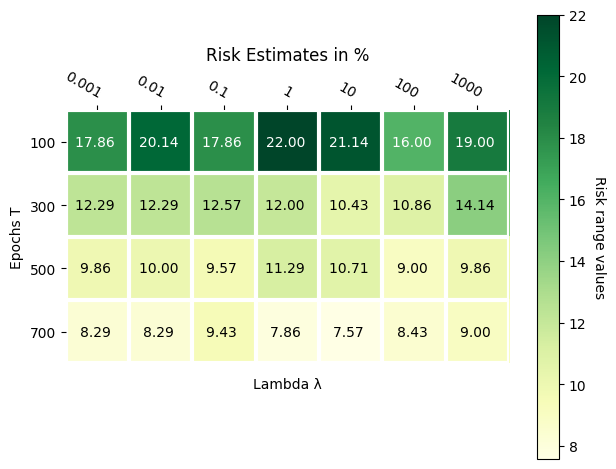

In [19]:
fig, ax = plt.subplots()

im, cbar = heatmap(risk, epochs, lamb, ax=ax,
                   cmap="YlGn", cbarlabel="Risk range values")
texts = annotate_heatmap(im, valfmt="{x:.2f} ")
ax.set_ylabel('Epochs T')
ax.set_title('Risk Estimates in %')
ax.set_xlabel('Lambda λ')

fig.tight_layout()
plt.show()

## The performance with respect to γ and λ

In [30]:
gamma=[0.00025,0.025,2.5,25]
lamb=[0.001,0.01,1,100,1000]
risk1=np.empty([len(gamma), len(lamb)])
i=0
j=0

for gam in gamma:
    for lam in lamb:
        print("Start computing risk estimate for gamma: ", gam, "and lambda value: ", lam,"\n")
        risk1[i][j]=pegasos_multi_classification(700, gamma=gamma[i], lamb=lamb[j])
        print("Risk estimate for gamma: ", gam, "and lambda value: ", lam," completed successfully\n")
        j+=1
    i+=1
    j=0     

Start computing risk estimate for gamma:  0.00025 and lambda value:  0.001 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [5.714285714285714, 5.0, 2.857142857142857, 6.428571428571428, 6.428571428571428] %

Test Risks:  [94.28571428571428, 95.0, 97.14285714285714, 93.57142857142857, 93.57142857142857] %

Risk estimate for gamma:  0.00025 and lambda value:  0.001  completed successfully

Start computing risk estimate for gamma:  0.00025 and lambda value:  0.01 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

S

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [76.42857142857142, 78.57142857142857, 84.28571428571429, 75.0, 83.57142857142857] %

Test Risks:  [23.57142857142857, 21.428571428571427, 15.714285714285714, 25.0, 16.428571428571427] %

Risk estimate for gamma:  2.5 and lambda value:  0.01  completed successfully

Start computing risk estimate for gamma:  2.5 and lambda value:  1 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 

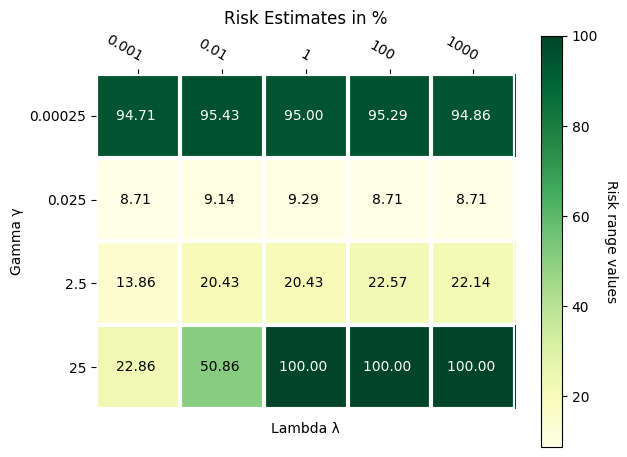

In [31]:
#Plot the heatmap
fig, ax = plt.subplots()

im, cbar = heatmap(risk1, gamma, lamb, ax=ax,
                   cmap="YlGn", cbarlabel="Risk range values")
texts = annotate_heatmap(im, valfmt="{x:.2f} ")
ax.set_ylabel('Gamma γ')
ax.set_title('Risk Estimates in %')
ax.set_xlabel('Lambda λ')

fig.tight_layout()
plt.show()

## Pegasos performance for different kernel types

In [32]:
#Linear Kernel
epochs2=[700]
lamb2=[0.001,0.01,0.1,1,10,100,1000]
risk2=np.empty([len(epochs2), len(lamb2)])
i=0
j=0

for ep in epochs2:
    for lam in lamb2:
        print("Start computing risk estimate for epochs: ", ep, "and lambda value: ", lam,"\n")
        risk2[i][j]=pegasos_multi_classification(epochs2[i],lamb2[j],kernel="linear")
        print("Risk estimate for epochs: ", ep, "and lambda value: ", lam," completed successfully\n")
        j+=1
    i+=1
    j=0     

Start computing risk estimate for epochs:  700 and lambda value:  0.001 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [76.42857142857142, 82.14285714285714, 69.28571428571428, 82.14285714285714, 84.28571428571429] %

Test Risks:  [23.57142857142857, 17.857142857142858, 30.714285714285715, 17.857142857142858, 15.714285714285714] %

Risk estimate for epochs:  700 and lambda value:  0.001  completed successfully

Start computing risk estimate for epochs:  700 and lambda value:  0.01 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fit

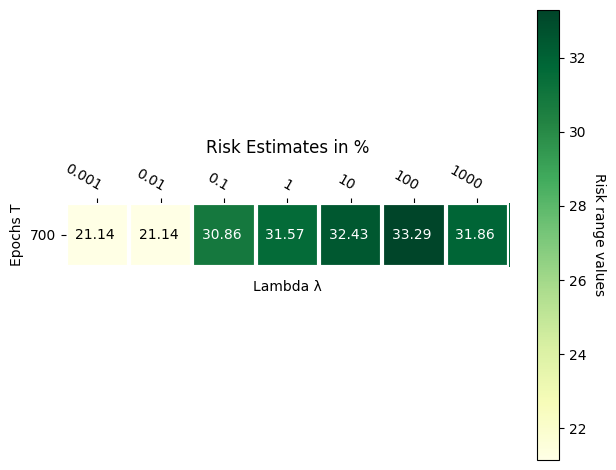

In [34]:
fig, ax = plt.subplots()

im, cbar = heatmap(risk2, epochs2, lamb2, ax=ax,
                   cmap="YlGn", cbarlabel="Risk range values")
texts = annotate_heatmap(im, valfmt="{x:.2f} ")
ax.set_ylabel('Epochs T')
ax.set_title('Risk Estimates in %')
ax.set_xlabel('Lambda λ')

fig.tight_layout()
plt.show()

In [36]:
#Polynomial Kernel
epochs3=[700]
lamb3=[0.001,0.01,0.1,1,10,100,1000]
risk3=np.empty([len(epochs3), len(lamb3)])
i=0
j=0

for ep in epochs3:
    for lam in lamb3:
        print("Start computing risk estimate for epochs: ", ep, "and lambda value: ", lam,"\n")
        risk3[i][j]=pegasos_multi_classification(epochs3[i],lamb3[j],kernel="polynomial")
        print("Risk estimate for epochs: ", ep, "and lambda value: ", lam," completed successfully\n")
        j+=1
    i+=1
    j=0  

Start computing risk estimate for epochs:  700 and lambda value:  0.001 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [84.28571428571429, 89.28571428571429, 90.71428571428571, 83.57142857142857, 90.0] %

Test Risks:  [15.714285714285714, 10.714285714285714, 9.285714285714286, 16.428571428571427, 10.0] %

Risk estimate for epochs:  700 and lambda value:  0.001  completed successfully

Start computing risk estimate for epochs:  700 and lambda value:  0.01 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start 

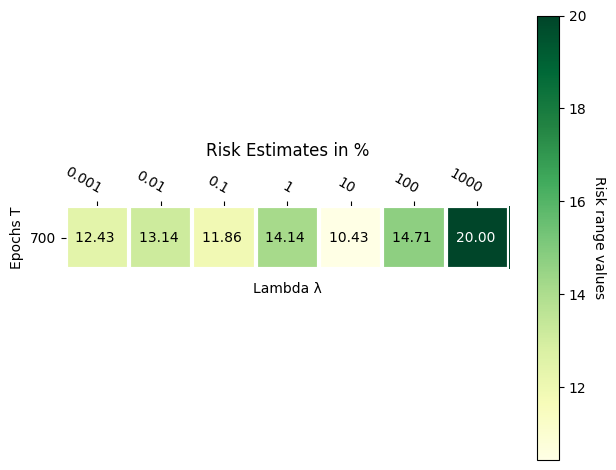

In [37]:
fig, ax = plt.subplots()

im, cbar = heatmap(risk3, epochs3, lamb3, ax=ax,
                   cmap="YlGn", cbarlabel="Risk range values")
texts = annotate_heatmap(im, valfmt="{x:.2f} ")
ax.set_ylabel('Epochs T')
ax.set_title('Risk Estimates in %')
ax.set_xlabel('Lambda λ')

fig.tight_layout()
plt.show()

## PCA performance for different numbers of components

The shape of the dataset is:  (700, 256)
Start computing risk estimate for epochs:  700 and lambda value:  0.001 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [82.14285714285714, 91.42857142857143, 89.28571428571429, 90.71428571428571, 92.14285714285714] %

Test Risks:  [17.857142857142858, 8.571428571428571, 10.714285714285714, 9.285714285714286, 7.857142857142857] %

Risk estimate for epochs:  700 and lambda value:  0.001  completed successfully

Start computing risk estimate for epochs:  700 and lambda value:  0.01 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predictin

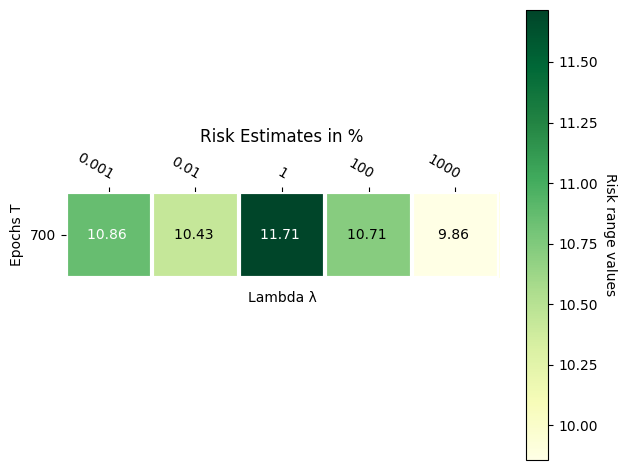

In [40]:
#load the original dataset and calculate the performance for T=700 
X_train = pd.DataFrame(X_tr)
X_test = pd.DataFrame(X_te)
X = pd.concat([X_train, X_test])
X=X.iloc[:700]
X=X.to_numpy()

print("The shape of the dataset is: ",np.shape(X))

epochs4=[700]
lamb4=[0.001,0.01,1,100,1000]
risk4=np.empty([len(epochs4), len(lamb4)])
i=0
j=0

for ep in epochs4:
    for lam in lamb4:
        print("Start computing risk estimate for epochs: ", ep, "and lambda value: ", lam,"\n")
        risk4[i][j]=pegasos_multi_classification(epochs4[i],lamb4[j])
        print("Risk estimate for epochs: ", ep, "and lambda value: ", lam," completed successfully\n")
        j+=1
    i+=1
    j=0 

# Plot the heatmap
fig, ax = plt.subplots()
im, cbar = heatmap(risk4, epochs4, lamb4, ax=ax,
                   cmap="YlGn", cbarlabel="Risk range values")
texts = annotate_heatmap(im, valfmt="{x:.2f} ")
ax.set_ylabel('Epochs T')
ax.set_title('Risk Estimates in %')
ax.set_xlabel('Lambda λ')

fig.tight_layout()
plt.show()

The shape of the dataset is:  (700, 80)
Start computing risk estimate for epochs:  700 and lambda value:  0.001 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting process of the fold n.: 2 

Start fitting process  3 /5 

Start predicting process of the fold n.: 3 

Start fitting process  4 /5 

Start predicting process of the fold n.: 4 

Start fitting process  5 /5 

Start predicting process of the fold n.: 5 

Test Accuracy Scores:  [92.14285714285714, 92.85714285714286, 85.71428571428571, 88.57142857142857, 93.57142857142857] %

Test Risks:  [7.857142857142857, 7.142857142857142, 14.285714285714285, 11.428571428571429, 6.428571428571428] %

Risk estimate for epochs:  700 and lambda value:  0.001  completed successfully

Start computing risk estimate for epochs:  700 and lambda value:  0.01 

Start fitting process  1 /5 

Start predicting process of the fold n.: 1 

Start fitting process  2 /5 

Start predicting

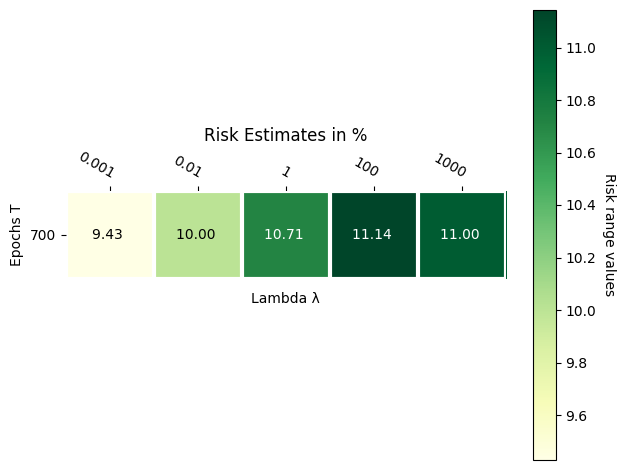

In [41]:
#load the original dataset and calculate the performance for T=700 
#Apply PCA with 80 components
X_train = pd.DataFrame(X_tr)
X_test = pd.DataFrame(X_te)
X = pd.concat([X_train, X_test])
X=X.iloc[:700]

pca_fin = PCA(n_components=80)
X=pca_fin.fit_transform(X)
print("The shape of the dataset is: ",np.shape(X))

epochs5=[700]
lamb5=[0.001,0.01,1,100,1000]
risk5=np.empty([len(epochs5), len(lamb5)])
i=0
j=0

for ep in epochs5:
    for lam in lamb5:
        print("Start computing risk estimate for epochs: ", ep, "and lambda value: ", lam,"\n")
        risk5[i][j]=pegasos_multi_classification(epochs5[i],lamb5[j])
        print("Risk estimate for epochs: ", ep, "and lambda value: ", lam," completed successfully\n")
        j+=1
    i+=1
    j=0

    
# Plot the heatmap
fig, ax = plt.subplots()

im, cbar = heatmap(risk5, epochs5, lamb5, ax=ax,
                   cmap="YlGn", cbarlabel="Risk range values")
texts = annotate_heatmap(im, valfmt="{x:.2f} ")
ax.set_ylabel('Epochs T')
ax.set_title('Risk Estimates in %')
ax.set_xlabel('Lambda λ')

fig.tight_layout()
plt.show()